In [1]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.improve_dataset import  *
from datasets.balance_dataset import *
from utils.linkage import *
from model.improvehc import improvehc
from model.balancehc import balancehc

from utils.poincare import *


In [2]:
method = 'average'
cell_path1 = './datas/test/A35.h5'
folder_path1 = "./datas/1122/1/"
radius1 = 147.63807097087118 *3
c1= 0.001
epoches1 = 5
cell_path2 = './datas/test/A36.h5'
folder_path2 = "./datas/1122/2/"
radius2 = 149.58609561052123 * 3
c2= 0.001
epoches2 =5

In [3]:
loss1 = merge_by_radius(cell_path1,folder_path1,radius1,method)
print("cell meta score for dataset1: {}\n".format(loss1))


100%|██████████████████████████████████████| 4128/4128 [00:27<00:00, 147.68it/s]


cell meta score for dataset1: 0.4723837209302325



In [4]:


adata1 = pd.read_csv(folder_path1+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata1 = adata1.set_index(adata1.columns[0])
adata1 = anndata.AnnData(adata1)
adata1.obs['celltype'] = cell_meta.values.reshape(-1)

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_1376/1659954021.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = anndata.AnnData(adata1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
loss2 = merge_by_radius(cell_path2,folder_path2,radius2,method)
print("cell meta score for dataset2: {}".format(loss2))

100%|██████████████████████████████████████| 5565/5565 [00:28<00:00, 192.59it/s]


cell meta score for dataset2: 0.4332434860736748


In [6]:

adata2 = pd.read_csv(folder_path2+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata2 = adata2.set_index(adata2.columns[0])
adata2 = anndata.AnnData(adata2)
adata2.obs['celltype'] = cell_meta.values.reshape(-1)

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_1376/1560116638.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = anndata.AnnData(adata2)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
preprocessing_cluster(adata1,N_pcs=50,resolution=1)
preprocessing_cluster(adata2,N_pcs=50,resolution=1)

inter_gene = sort_data(adata1,adata2)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
tmp2 = calculate_cluster_centroid_for_genes(adata2,inter_gene,folder_path2)

ari = adjusted_rand_score(adata1.obs['celltype'].tolist(), adata1.obs['leiden'].tolist())
print("ARI score for adata1: ", ari)

ari = adjusted_rand_score(adata2.obs['celltype'].tolist(), adata2.obs['leiden'].tolist())
print("ARI score for adata2: ", ari)
meta_list1 = []
clustername = adata1.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata1.obs['leiden']) if x == str(value)]
    t = [adata1.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list1.append(most_common_element)
np.save(folder_path1+'tree_merge.npy',meta_list1)

    
meta_list2 = []
clustername = adata2.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata2.obs['leiden']) if x == str(value)]
    t = [adata2.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list2.append(most_common_element)
np.save(folder_path2+'tree_merge.npy',meta_list2)

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


870 genes are used to calculate cost of tree alignment.

ARI score for adata1:  0.27335297912073997
ARI score for adata2:  0.1700514200953091


In [8]:

v1 = pd.read_csv(folder_path1+"merge_labels.csv")
meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata1.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path1+'meta_result.csv')

v1 = pd.read_csv(folder_path2+"merge_labels.csv")
meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata2.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path2+'meta_result.csv')

In [18]:
data_path = folder_path1+'datas.data'
start = 1
end = tmp1.shape[1]+1
lable = 0
epoches = epoches1
save_path=folder_path1
c=0
model_path=folder_path1+'model.pth'

In [19]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,start,end,lable)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

if(model_path==None or os.path.exists(model_path)==False):
    model.to("cpu")
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model.parameters(),0.0005)
    train(model,dataloader,optimizer,similarities,epoches);
    torch.save(model.state_dict(),save_path+'model.pth');
else:
    params = torch.load((model_path), map_location=torch.device('cpu'))
    model.load_state_dict(params, strict=False)
model.eval()


./datas/1122/1/datas.data length:5
Generating all pairs superset


HypHC(
  (embeddings): Embedding(5, 2)
)

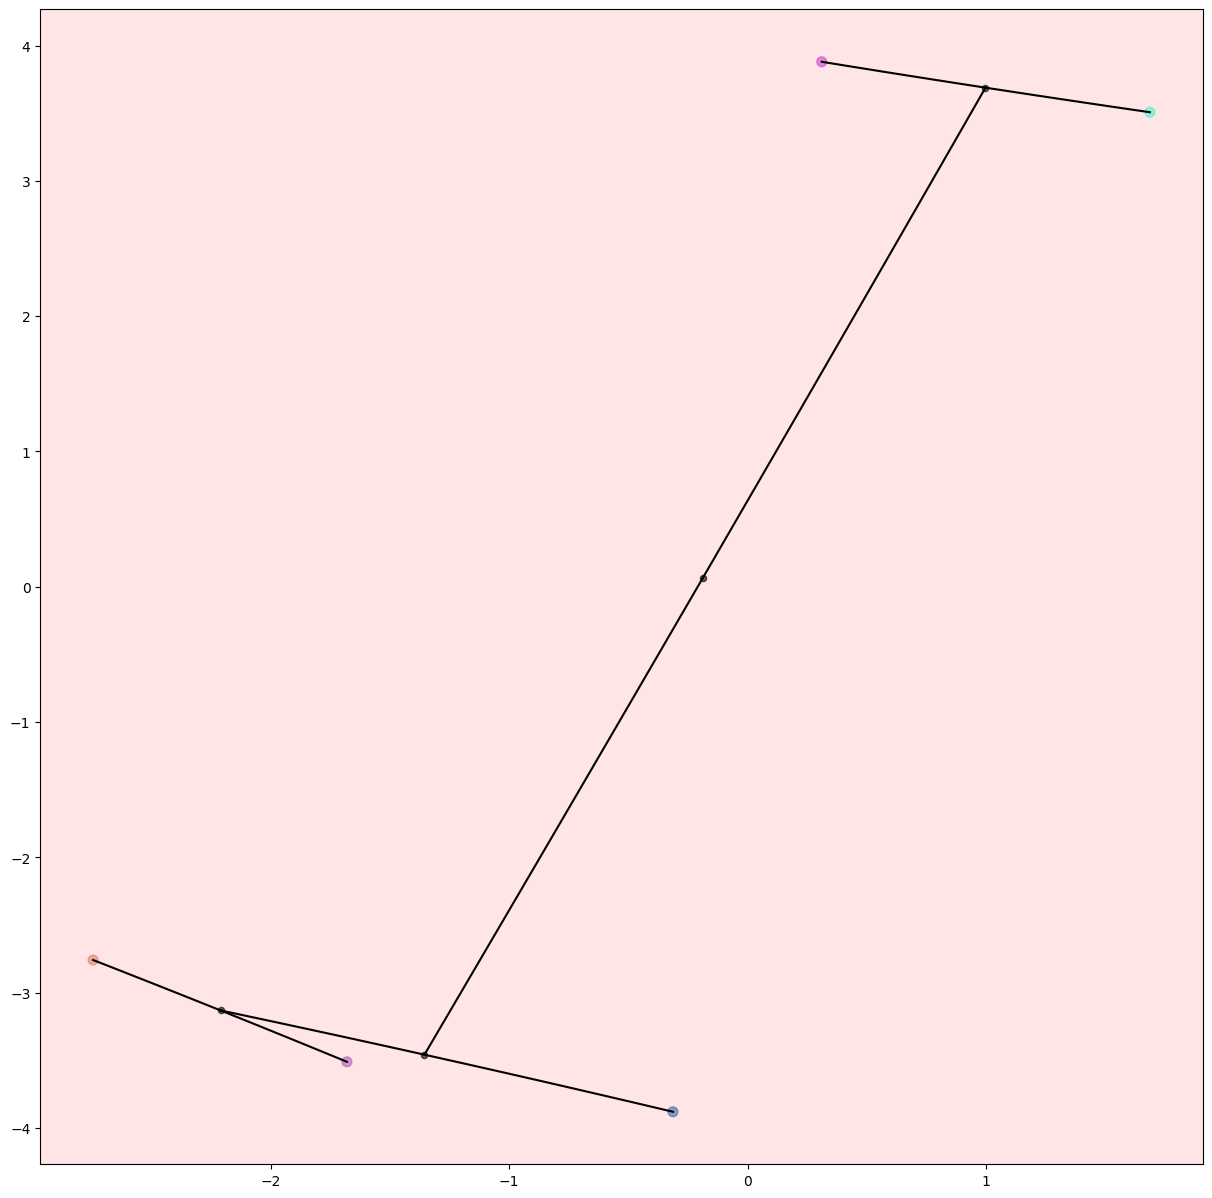

In [20]:
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)

# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

# where_are_NaNs = np.isnan(embeddings)
# embeddings[where_are_NaNs] = 0
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0]*20, embeddings[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(embeddings[n:,0]*20,embeddings[n:,1]*20,color = 'black',s=20,alpha=0.6)


for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2];
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph.png");

np.save(save_path+'data_hyper_xy.npy',embeddings)
# embeddings = np.array(uf.pos)

embbedings = torch.tensor(embeddings)
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

values = [];
fathers = [];

search_merge_tree(root,-1,0,values,fathers)
np.save(save_path+"dataxy.npy",values)
np.save(save_path+"datalink.npy",fathers)
# return loss2



In [90]:
def deep_search_tree(now,depth,path,f):
    now.f=f
    now.depth=depth;
    path.append(now);
    now.path=path.copy();
    if(f!=now):
        now.distance_to_root = f.distance_to_root + hyp_dist(f.value,now.value)
    else:
        now.distance_to_root = 0
        
    for i in now.son:
        deep_search_tree(i,depth+1,path,now);
    path.remove(now)
def find_lca(node1,node2):
    minnum = min(len(node1.path),len(node2.path));
    for i in range(minnum):
        if(node1.path[i]!=node2.path[i]):
            return node1.path[i-1];
    return node1.path[minnum-1];

def find_binary_son(nodes_list):
    ans = [];
    for i in nodes_list:
        if(len(i.subson)==2):
            ans.append(i)
    #     if(len(i.son) ==2 and len(i.son[0].son)==0 and len(i.son[1].son)==0 ):
    #         ans.append(i);
    return ans;


In [91]:
deep_search_tree(root,0,[],root)
binary_sons = find_binary_son(nodes1)
result = []
distances = []
for i in binary_sons:
    for j in i.rest(n):
        result.append([i.subson,j,int(i),int(find_lca(i,nodes1[j]))])
result

for i in nodes1:
    distances.append(i.distance_to_root);
distances = torch.tensor(distances)
distances

tensor([1.5035, 1.4049, 1.4049, 1.8913, 1.8913, 1.4473, 0.9258, 0.9411, 0.0000],
       dtype=torch.float64)

start rotate

In [92]:
result

[[[3, 4], 0, 5, 6], [[3, 4], 1, 5, 8], [[3, 4], 2, 5, 8]]

In [93]:
embeddings = complete_tree(tree, leaves_embeddings)
embbedings = torch.tensor(embbedings)


dataset_test=balance_dataset(similarities,100,embbedings,distances,result)
dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=False, num_workers=8, pin_memory=True)
model2 = balancehc(leaves_embeddings,hyperparamter = 1)
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model2.parameters(),0.0005)
for epoch in range(10):
    model2.train()
    total_loss = 0.0
    for step, datas in enumerate(dataloader):
        loss = model2.loss(datas[0],datas[1],datas[2],datas[3],datas[4])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_1376/2318901486.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embbedings = torch.tensor(embbedings)
/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/datasets/balance_dataset.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)
/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/model/balancehc.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.embedding

	 Epoch 0 | average train loss: 0.359333
	 Epoch 1 | average train loss: 0.358927
	 Epoch 2 | average train loss: 0.358722
	 Epoch 3 | average train loss: 0.358624
	 Epoch 4 | average train loss: 0.358401
	 Epoch 5 | average train loss: 0.358047
	 Epoch 6 | average train loss: 0.357941
	 Epoch 7 | average train loss: 0.357743
	 Epoch 8 | average train loss: 0.357608
	 Epoch 9 | average train loss: 0.357435


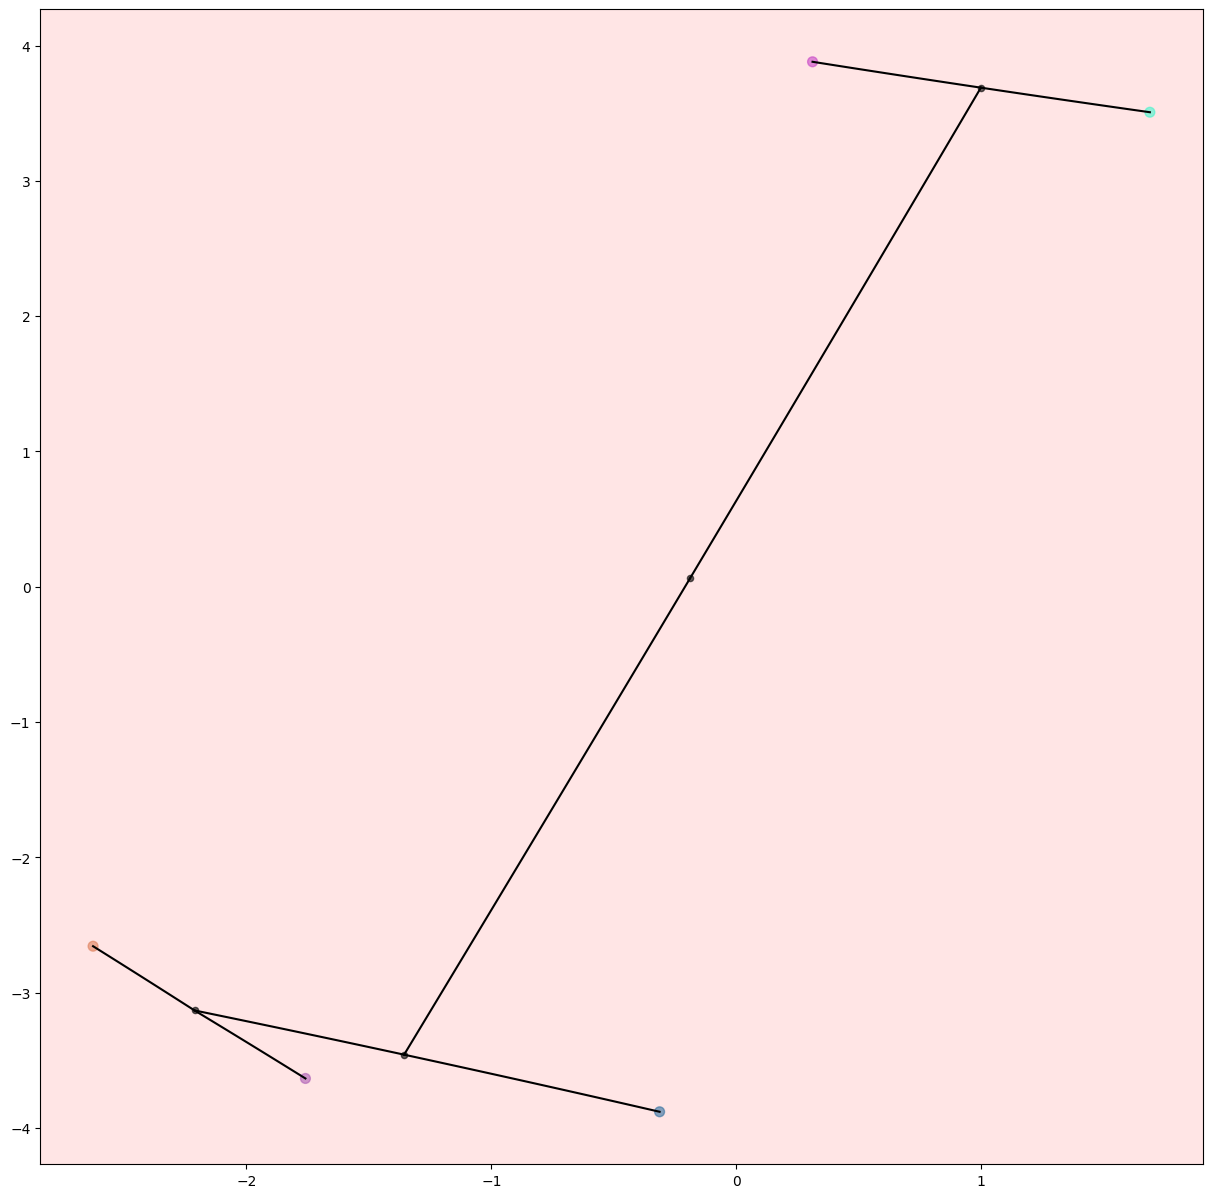

In [94]:
temp = model2.embeddings.weight.data

after_balance = embeddings.copy();
for i in range(len(temp)):
    after_balance[i] = temp[i].detach().numpy() 
# after_balance = model2.normalize_embeddings(torch.tensor(after_balance))
after_balance = project(torch.tensor(after_balance))
after_balance = np.array(after_balance)
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(after_balance[:n, 0]*20, after_balance[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(after_balance[n:,0]*20,after_balance[n:,1]*20,color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = after_balance[n1];
    x2 = after_balance[n2]
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph_after.png")
np.save(save_path+'data_hyper_xy_after.npy',after_balance)

In [95]:
dataset_test.datas

array([[list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [list([3, 4]), 1, 5, 8],
       [list([3, 4]), 2, 5, 8],
       [list([3, 4]), 0, 5, 6],
       [

In [96]:
datas

[tensor([3]),
 tensor([4]),
 tensor([1]),
 tensor([2.8522], dtype=torch.float64),
 tensor([[0.3791, 0.2931]], dtype=torch.float64)]

In [97]:
embbedings

tensor([[-0.0156, -0.1940],
        [ 0.0156,  0.1940],
        [ 0.0844,  0.1754],
        [-0.1373, -0.1379],
        [-0.0841, -0.1755],
        [-0.1106, -0.1566],
        [-0.0678, -0.1729],
        [ 0.0499,  0.1844],
        [-0.0094,  0.0031]], dtype=torch.float64)

In [98]:
after_balance

array([[-0.0156496223, -0.1939987838],
       [ 0.0155675355,  0.194005385 ],
       [ 0.0844255835,  0.1753646433],
       [-0.1312892437, -0.1328184605],
       [-0.0879420713, -0.181686461 ],
       [-0.1105766071, -0.1565524961],
       [-0.0678003049, -0.1728939796],
       [ 0.0499306278,  0.1844414579],
       [-0.0094416775,  0.0031112989]])

In [99]:
hyp_dist(torch.tensor(embeddings[1]),torch.tensor(embeddings[2])) ,hyp_dist(torch.tensor(after_balance[1]),torch.tensor(after_balance[2]))

(tensor([0.6517], dtype=torch.float64), tensor([0.6517], dtype=torch.float64))

In [100]:
hyp_dist(torch.tensor(embeddings[3]),torch.tensor(embeddings[4])) ,hyp_dist(torch.tensor(after_balance[3]),torch.tensor(after_balance[4]))

(tensor([0.6240], dtype=torch.float64), tensor([0.6243], dtype=torch.float64))

In [101]:
hyp_dist(torch.tensor(embeddings[3]),torch.tensor(embeddings[5])) ,hyp_dist(torch.tensor(after_balance[3]),torch.tensor(after_balance[5]))

(tensor([0.4440], dtype=torch.float64), tensor([0.4344], dtype=torch.float64))

In [102]:
hyp_dist(torch.tensor(embeddings[4]),torch.tensor(embeddings[5])) ,hyp_dist(torch.tensor(after_balance[4]),torch.tensor(after_balance[5]))

(tensor([0.4440], dtype=torch.float64), tensor([0.4540], dtype=torch.float64))

In [32]:
model2.original

array([[-0.015649622, -0.19399878 ],
       [ 0.015567536,  0.19400539 ],
       [ 0.08442558 ,  0.17536464 ],
       [-0.13733447 , -0.13791187 ],
       [-0.084062986, -0.17553873 ]], dtype=float32)

In [42]:
np.around(similarities,1).sum(axis=1)

array([2.6, 2.5, 2.2, 2.8, 2.7])

In [ ]:
datas

In [ ]:
loss = model2.loss(datas[0],datas[1],datas[2],datas[3],datas[4])
loss

In [ ]:
e1 = model2.embeddings(datas[0]);
e2 = model2.embeddings(datas[1]);
e3 = model2.embeddings(datas[2]).clone().detach();
e1 = model2.normalize_embeddings(e1);
e2 = model2.normalize_embeddings(e2);
e3 = model2.normalize_embeddings(e3);

In [ ]:
origin_distance = hyp_dist(torch.tensor(model2.original[datas[0]]),torch.tensor(model2.original[datas[1]]));
origin_distance

In [ ]:
d1 = hyp_dist(e1,e3) + datas[3];
d2 = hyp_dist(e2,e3) + datas[3];
lca_norm = torch.cat([d1, d2], dim=-1)
weights = torch.softmax(lca_norm / model2.temperature, dim=-1)
w_ord = torch.sum(datas[4] * weights, dim=-1, keepdim=True)


In [ ]:
total = torch.sum(datas[4], dim=-1, keepdim=True) - w_ord + model2.hyperparamter*torch.abs(origin_distance - hyp_dist(e1,e2));
total

In [ ]:
x, y_true, similarities = load_data('./datas/pre3/d1/datas.data',1,1616,0)
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)
params=torch.load('./datas/pre3/d1/model.pth')
model.load_state_dict(params, strict=False)
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0
tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)
n = len(leaves_embeddings)
# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

In [ ]:
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=embeddings[i];
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

In [ ]:
result = []

for t in (dumpy_node):
    left = t.son[0].subson
    right = t.son[1].subson;
    out_inner=[];
    for i in left:
        inner_list=[];
        for j in right:
            inner_list.append([i,j])
        out_inner.append(inner_list)
    result.append(out_inner)
result

In [ ]:

dataset_test = IMDataset(similarities,2560,leaves_embeddings,result)
dataset_test

In [ ]:
len(dataset_test)

In [ ]:
dumpys = [i.value for i in dumpy_node]
dumpys

In [ ]:
from model.improvehc import improvehc

dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=True, num_workers=8, pin_memory=True)
model = improvehc(leaves_embeddings,dumpys,dataset_test.n_nodes)

In [ ]:
for step,i in enumerate(dataset_test):
    print(step,i)
    break

In [ ]:
dataset_test[1]

In [ ]:
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.05)

# train(model,dataloader,optimizer,similarities,epoches);

In [ ]:
for epoch in range(20):
    model.train()
    total_loss = 0.0
    print(model.embeddings.weight.data)
    for step, data in enumerate(dataloader):
        lca = data[0]
        l_and_r = data[1].tolist()
        sims = data[2]
        loss = model.loss(lca,l_and_r,sims)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))

    # keep best embeddings
    # if (epoch + 1) % 1 == 0:
#         tree = model.decode_tree(fast_decoding=1)
#         cost = dasgupta_cost(tree, similarities)
#         logging.info("{}:\t{:.4f}".format("Dasgupta's cost", cost))
#         if cost < best_cost:
#             counter = 0
#             best_cost = cost
#             best_model = model.state_dict()
#         else:
#             counter += 1
#             if counter == 20:
# #                 logging.info("Early stopping.")
#                 return


In [ ]:
d1=torch.tensor(embeddings[0])
d2=torch.tensor(embeddings[1])

In [ ]:
hyp_dist_o(d1)+hyp_dist_o(d2)

In [ ]:
hyp_dist(d1,d2)

In [ ]:
similarities

In [ ]:
hyp_dist(torch.tensor(nodes1[0].value),torch.tensor(nodes1[1].value))
